In [1]:
!pip install tensorflow keras matplotlib seaborn scikit-learn pillow streamlit


In [8]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


In [9]:
# Path to zip file and extraction folder
zip_path = r"C:\Users\sathw\OneDrive\Desktop\Dataset.zip"
extract_path = r"C:\Users\sathw\OneDrive\Desktop\Dataset"

# Extract if the folder does not already exist
if not os.path.exists(extract_path):
    print("Extracting dataset ZIP...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Extraction complete!")
else:
    print("Extraction folder already exists — skipping extraction.")


Extracting dataset ZIP...
Extraction complete!


In [10]:
# Example for: Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train etc.

base_path = os.path.join(extract_path, "images.cv_jzk6llhf18tm3k0kyttxz", "data")
train_dir = os.path.join(base_path, "train")
val_dir   = os.path.join(base_path, "val")
test_dir  = os.path.join(base_path, "test")

# Confirm existence:
print("Train:", os.path.exists(train_dir))
print("Val:", os.path.exists(val_dir))
print("Test:", os.path.exists(test_dir))


Train: True
Val: True
Test: True


In [11]:
image_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [12]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_cnn = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


C:\Users\sathw\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\sathw\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 179s 909ms/step - accuracy: 0.3110 - loss: 1.9779 - val_accuracy: 0.5559 - val_loss: 1.4713
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 83s 423ms/step - accuracy: 0.4885 - loss: 1.5060 - val_accuracy: 0.5742 - val_loss: 1.2746
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 85s 437ms/step - accuracy: 0.5467 - loss: 1.3430 - val_accuracy: 0.6987 - val_loss: 1.0222
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 103s 528ms/step - accuracy: 0.5749 - loss: 1.2314 - val_accuracy: 0.6978 - val_loss: 1.0034
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 89s 456ms/step - accuracy: 0.6129 - loss: 1.1306 - val_accuracy: 0.7280 - val_loss: 0.8713
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 86s 438ms/step - accuracy: 0.6426 - loss: 1.0732 - val_accuracy: 0.6969 - val_loss: 0.9430
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 88s 452ms/step - accuracy: 0.6680 - loss: 0.9740 - val_accuracy: 0.7408 - val_loss: 0.7720
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 84s 430ms/step - accuracy: 0.6965 - loss:

3187/3187 ━━━━━━━━━━━━━━━━━━━━ 46s 14ms/step - accuracy: 0.7283 - loss: 0.7817
Test Accuracy: 72.83%
3187/3187 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step


C:\Users\sathw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sathw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sathw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                  precision    recall  f1-score   support

                     animal fish       0.73      0.98      0.84       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.85      0.71      0.77       298
   fish sea_food gilt_head_bream       0.91      0.32      0.47       305
   fish sea_food hourse_mackerel       0.83      0.73      0.78       286
        fish sea_food red_mullet       0.70      0.99      0.82       291
     fish sea_food red_sea_bream       0.57      0.75      0.65       273
          fish sea_food sea_bass       0.74      0.59      0.66       327
            fish sea_food shrimp       0.83      0.75      0.79       289
fish sea_food striped_red_mullet       0.96      0.37      0.54       293
             fish sea_food trout       0.60      0.95      0.73       292

                        accuracy                           0.73      3187
                       macro avg    

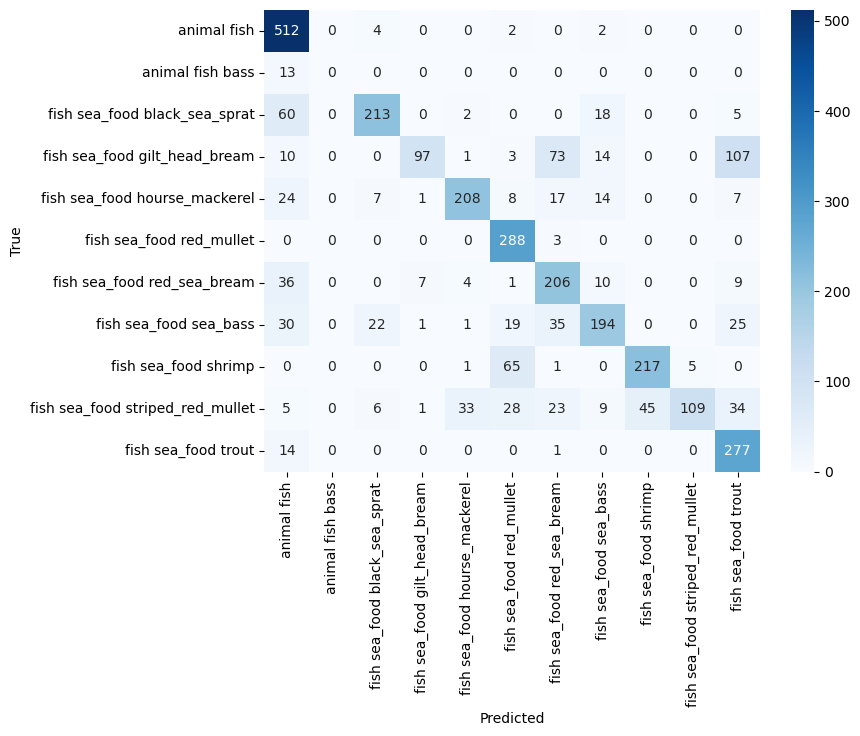

In [13]:
cnn_loss, cnn_acc = cnn_model.evaluate(test_generator)
print(f"Test Accuracy: {cnn_acc*100:.2f}%")

y_true = test_generator.classes
y_pred = np.argmax(cnn_model.predict(test_generator), axis=1)
target_names = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [14]:
#Step 7: Transfer Learning with VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))
for layer in base_model.layers:
    layer.trainable = False

transfer_model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

transfer_model.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

history_vgg = transfer_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.5435 - loss: 1.3752 - val_accuracy: 0.7940 - val_loss: 0.8010
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.7513 - loss: 0.7927 - val_accuracy: 0.8599 - val_loss: 0.5459
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.8172 - loss: 0.5831 - val_accuracy: 0.8993 - val_loss: 0.4101
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.8476 - loss: 0.4950 - val_accuracy: 0.9038 - val_loss: 0.3433
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 366s 2s/step - accuracy: 0.8696 - loss: 0.4339 - val_accuracy: 0.9158 - val_loss: 0.3000


In [15]:
#Step 8: Save the Best Model
transfer_model.save("fish_classifier_vgg16.h5")
print("Model saved as fish_classifier_vgg16.h5")


Model saved as fish_classifier_vgg16.h5


In [22]:


#Step 9: Test a Single Image
from tensorflow.keras.preprocessing import image

img_path = r"C:\Users\sathw\OneDrive\Desktop\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\test\animal fish\00ZR1T3Q2G5Z.jpg"  # Change this!
img = image.load_img(img_path, target_size=image_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
pred = transfer_model.predict(img_array)
pred_class = target_names[np.argmax(pred)]
print(f"Predicted Class: {pred_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
Predicted Class: animal fish


In [1]:
import os

filepath = 'fish_classifier_vgg16.h5'  # put your full file path if needed
print("File exists:", os.path.exists(filepath))


File exists: True


In [2]:
!pip install streamlit
